In [2]:

import time
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pydantic import BaseModel, Field
from typing import Optional, Any, Union
from plot_lib.plot_rainfall import integrate_datetime, RainGauge

In [20]:
sns.set_style('darkgrid')
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
app = RainGauge()

In [22]:
dfg = app.df_interpolate_nan(path='gsmap2022.xlsx')
dfg.head()

,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,...,18Z,19Z,20Z,21Z,22Z,23Z,sum,year,month,day
0,0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,0,...,0.5698800086975098,0.17173077166080475,0.22759518027305603,0.15417519211769104,0.14867419004440308,0.1414373219013214,1.4134926795959473,2022,7,2
1,1,2,325,Mae Sariang,Northern,18.166667,97.933333,0,0,0,...,0.4624394178390503,0.1064237728714943,0.08311599493026733,0.07849250733852386,0.0923473909497261,0.06365538388490677,0.8864744901657104,2022,7,2
2,2,3,303,Chiang Rai,Northern,19.961389,99.881389,0,0.5173004269599915,0.2576569616794586,...,0,0,0,0,0,0,3.2337076663970947,2022,7,2
3,3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0.31870177388191223,0.2236250340938568,...,0,0,0,0,0,0,2.828620433807373,2022,7,2
4,4,5,310,Phayao,Northern,19.133333,99.900000,0,0,0,...,0,0,0,0,0,0,2.6045122146606445,2022,7,2


In [23]:
dfp = app.df_interpolate_nan(path='persiann2022.xlsx')
dfp.head()

,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,02Z,...,18Z,19Z,20Z,21Z,22Z,23Z,sum,year,month,day
0,0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,0,...,0,0,0,0,0,0,0,2022,3,9
1,1,2,325,Mae Sariang,Northern,18.166667,97.933333,0,0,0,...,0,0,0,0,0,0,0,2022,3,9
2,2,3,303,Chiang Rai,Northern,19.961389,99.881389,0,0,0,...,0,0,0,0,0,0,0,2022,3,9
3,3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0,0,...,0,0,0,0,0,0,0,2022,3,9
4,4,5,310,Phayao,Northern,19.133333,99.900000,0,0,0,...,0,0,0,0,0,0,0,2022,3,9


In [24]:
dft = app.df_interpolate_nan(path='new_thaiwater.xlsx', rainfall='rainfall')
dft

,index,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,0,8.665887,98.452998,Fri,5,27,2022
1,773,สถานีวิจัยต้นน้ำคีรีวง,ต.กำโลน อ.ลานสกา จ.นครศรีธรรมราช,00:00 น.,0.2,0,8.432136,99.768825,Fri,5,27,2022
2,772,เปร็ดใน,ต.ห้วงน้ำขาว อ.เมืองตราด จ.ตราด,00:00 น.,0.4,0,12.142047,102.529795,Fri,5,27,2022
3,771,ทต.ห้องแซง,ต.ห้องแซง อ.เลิงนกทา จ.ยโสธร,00:00 น.,0.4,0,16.268099,104.405860,Fri,5,27,2022
4,770,สะพานบางไตประชาบริรักษ์,ต.ตะกุกเหนือ อ.วิภาวดี จ.สุราษฎร์ธานี,00:00 น.,0.4,0,9.282494,98.876948,Fri,5,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
134263,133127,สถานีหน่วยพิทักษ์ป่าอ่าวท่ายาง,ต.เกาะหมาก อ.ปากพะยูน จ.พัทลุง,22:00,1.4,0,0.000000,0.000000,Mon,8,29,2022
134264,133126,สถานีหน่วยอนุรักษ์และจัดการต้นน้ำคลองอุดม,ต.วังทอง อ.วังสมบูรณ์ จ.สระแก้ว,22:00,1.4,0,0.000000,0.000000,Mon,8,29,2022
134265,133125,สถานีเชียงใหม่,ต.ศรีภูมิ อ.เมืองเชียงใหม่ จ.เชียงใหม่,19:00,1.1,0,0.000000,0.000000,Mon,8,29,2022
134266,133123,สถานีบ้านแม่ป๋ามนอก,ต.ปิงโค้ง อ.เชียงดาว จ.เชียงใหม่,21:00,1.0,0,0.000000,0.000000,Mon,8,29,2022


In [25]:
dft = dft.loc[dft['lat'] > 0]
dft = integrate_datetime(dft, sum=False)
dft

/Users/kmac15/PycharmProjects/rain-gauge/plot_lib/plot_rainfall.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date
/Users/kmac15/PycharmProjects/rain-gauge/plot_lib/plot_rainfall.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['english_day'] = df.date.dt.strftime('%a')


,level_0,index,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,0,0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,2022-05-27 07:00:00+07:00,8.665887,98.452998,Fri,5,27,2022
1,773,6,อ่างเก็บน้ำห้วยซับเหล็ก,ต.โคกตูม อ.เมืองลพบุรี จ.ลพบุรี,17:00 น.,2.8,2022-05-27 07:00:00+07:00,14.814824,100.775807,Fri,5,27,2022
2,772,576,บ้านนาล้อม,ต.ป่าแดง อ.ชาติตระการ จ.พิษณุโลก,00:00 น.,1.5,2022-05-27 07:00:00+07:00,17.282264,100.536001,Fri,5,27,2022
3,771,1,บ้านทุ่งไพล,ต.เขาแดง อ.สะบ้าย้อย จ.สงขลา,00:00 น.,3.0,2022-05-27 07:00:00+07:00,6.547667,100.836956,Fri,5,27,2022
4,770,2,ปตร.กระมัง (ปากคลองข้าวเม่า),ต.หัวรอ อ.พระนครศรีอยุธยา จ.พระนครศรีอยุธยา,00:00 น.,3.0,2022-05-27 07:00:00+07:00,14.355067,100.583584,Fri,5,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53461,133013,134111,0,ต.ทุ่งสองห้อง อ.หลักสี่ จ.กรุงเทพมหานคร,22:00,40.5,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
53462,133063,134061,0,ต.โละจูด อ.แว้ง จ.นราธิวาส,22:00,73.6,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
53463,133092,134085,0,0,22:00,0.8,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
53464,132866,133459,0,ต.จตุจักร อ.จตุจักร จ.กรุงเทพมหานคร,22:00,25.0,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022


In [26]:
dfg = integrate_datetime(dfg)
dfg.head()

,index,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,15497,122,123,570,Satun,Southern WestCoast,6.650000,100.083334,0,0,...,0,0,0,0,13.146708,2021,11,22,2021-11-22 07:00:00+07:00,Mon
1,15406,31,32,353,Loei,Northeastern,17.450000,101.733333,0,0,...,0,0,0,0,0.000000,2021,11,22,2021-11-22 07:00:00+07:00,Mon
2,15407,32,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,...,0,0,0,0,0.000000,2021,11,22,2021-11-22 07:00:00+07:00,Mon
3,15408,33,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,...,0,0,0,0,0.000000,2021,11,22,2021-11-22 07:00:00+07:00,Mon
4,15409,34,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,...,0,0,0,0,0.000000,2021,11,22,2021-11-22 07:00:00+07:00,Mon


In [27]:
dfp = integrate_datetime(dfp)
dfp.head()

,index,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
0,4062,3,4,304,Chiang Rai (1),Northern,19.870833,99.782778,0,0,...,0,0,0,0,0.000000,2021,11,17,2021-11-17 07:00:00+07:00,Wed
1,4153,94,95,465,Phetchaburi,Southern EastCoast,12.999306,100.060528,8.510000228881836,0,...,0,0,0,0,8.510000,2021,11,17,2021-11-17 07:00:00+07:00,Wed
2,4152,93,94,501,Khlong Yai,Eastern,11.766667,102.883334,0,0,...,6.28000020980835,1.3600000143051147,0,0,22.890001,2021,11,17,2021-11-17 07:00:00+07:00,Wed
3,4151,92,93,481,Pluei (1),Eastern,12.508611,102.173056,0,0,...,0.03999999910593033,0,0,0,1.560000,2021,11,17,2021-11-17 07:00:00+07:00,Wed
4,4150,91,92,480,Chanthaburi,Eastern,12.616667,102.113333,0,0,...,0,0,0.6700000166893005,1.2799999713897705,1.950000,2021,11,17,2021-11-17 07:00:00+07:00,Wed


In [28]:
dfg_period = app.filter_dates(dfg, start_date='2022-05-27', end_date='2022-08-30')
dfg_period

,index,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
22509,29642,122,123,570,Satun,Southern WestCoast,6.650000,100.083334,0,0,...,0,0,0,0,0.723454,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22510,29641,121,122,567,Trang,Southern WestCoast,7.516667,99.616667,0,0,...,0,0,0,0,0.000000,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22511,29580,60,61,402,Chai Nat,Central,15.150003,100.183334,0,0,...,0,0,0,0,0.112654,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22512,29554,34,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,...,0.07619025558233261,0.0791679173707962,0.0726575031876564,1.0165468454360962,18.300827,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22513,29555,35,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,...,0.07619025558233261,0.0791679173707962,0.0726575031876564,1.0165468454360962,18.300827,2022,5,27,2022-05-27 07:00:00+07:00,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33205,27464,35,36,358,Nakhon Phanom (1),Northeastern,17.443056,104.773611,0,0,...,0,0,0,0,0.000000,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33206,27463,34,35,357,Nakhon Phanom,Northeastern,17.410833,104.782500,0,0,...,0,0,0,0,0.000000,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33207,27462,33,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,...,0,0,0,0,0.421416,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33208,27461,32,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,...,0,0,0,0,0.340960,2022,8,29,2022-08-29 07:00:00+07:00,Mon


In [29]:
dfp_period = app.filter_dates(dfp, start_date='2022-05-27', end_date='2022-08-30')
dfp_period

,index,Unnamed: 0.1,ID,WMO_CODE,NAME_EN,Region,Latitude,Longitude,00Z,01Z,...,20Z,21Z,22Z,23Z,sum,year,month,day,date,english_day
22755,17097,0,1,300,Mae Hong Son,Northern,19.298972,97.975778,0,0,...,0,0,0,0,0.000000,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22756,17187,90,91,479,Huai Pong (1),Eastern,12.733334,101.133334,0,0,...,0,0,0,0,8.130000,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22757,17186,89,90,478,Rayong,Eastern,12.617028,101.340750,0,0,...,0,0,0,0,9.809999,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22758,17185,88,89,477,Sattahip,Eastern,12.683334,100.983334,0,0,...,0,0,0,0,0.160000,2022,5,27,2022-05-27 07:00:00+07:00,Fri
22759,17184,87,88,461,Pattaya,Eastern,12.920000,100.869444,0,0,...,0,0,0,0,5.870000,2022,5,27,2022-05-27 07:00:00+07:00,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33082,2124,33,34,354,Udon Thani,Northeastern,17.383333,102.800000,0,0,...,0,0,0,0,0.000000,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33083,2123,32,33,350,Loei (1),Northeastern,17.400000,101.733333,0,0,...,0,0,0,0,0.000000,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33084,2122,31,32,353,Loei,Northeastern,17.450000,101.733333,0,0,...,0,0,0,0,0.000000,2022,8,29,2022-08-29 07:00:00+07:00,Mon
33085,2134,43,44,390,Kamalasai (2),Northeastern,16.332500,103.588333,0,0,...,0,0,0,0,1.790000,2022,8,29,2022-08-29 07:00:00+07:00,Mon


In [30]:
display(dft[:1]['date'])
display(dft[-1:]['date'])


0   2022-05-27 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]

53465   2022-08-29 07:00:00+07:00
Name: date, dtype: datetime64[ns, Asia/Bangkok]

In [31]:
items = {'source': ['gsmap', 'thaiwater', 'persiann'],
         'max': [dfg_period['sum'].max(), dft['rainfall'].max(), dfp_period['sum'].max()],
         'mean': [dfg_period['sum'].mean(), dft['rainfall'].mean(), dfp['sum'].mean()]}
df_stat = pd.DataFrame(items)
df_stat = df_stat.set_index('source')
df_stat


,max,mean
source,,
gsmap,301.576996,6.583328
thaiwater,536.000000,8.329306
persiann,129.860001,4.588826


Text(0, 0.5, 'Rainfall (mm)')

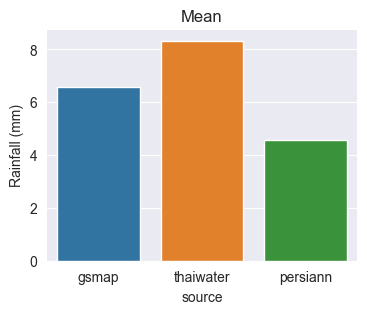

In [32]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.despine(fig, left=True, bottom=True)
sns.barplot(x=df_stat.index, y='mean', data=df_stat)
ax.set_title('Mean')
ax.set_ylabel('Rainfall (mm)')

Text(0, 0.5, 'Rainfall (mm)')

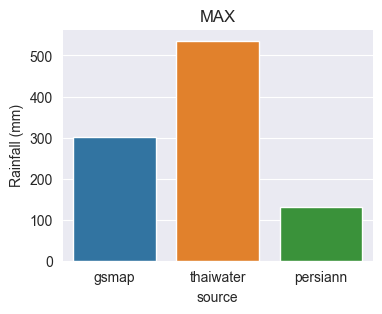

In [33]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.despine(fig, left=True, bottom=True)
sns.barplot(x=df_stat.index, y='max', data=df_stat)
ax.set_title('MAX')
ax.set_ylabel('Rainfall (mm)')

In [76]:
dfg_val = dfg_period[['NAME_EN', 'Latitude', 'Longitude', 'sum', 'date']].values
dft_val = dft[['station', 'lat', 'long', 'rainfall', 'date']].values
print(dft_val)

[['บ้านบางกุ่ม' 8.665886890599657 98.45299780368804 2.5]
 ['อ่างเก็บน้ำห้วยซับเหล็ก' 14.81482426457702 100.7758069038391 2.8]
 ['บ้านนาล้อม' 17.28226420045005 100.5360013246536 1.5]
 ...
 [0 14.49604637662732 102.2472238540649 0.8]
 [0 14.49604637662732 102.2472238540649 25.0]
 [0 14.49604637662732 102.2472238540649 1.2]]


In [73]:
def get_distant_station(station1_lat, station1_long, station2_lat, station2_long):
    R = 6373000
    station2_lat = math.radians(station2_lat)
    station2_long = math.radians(station2_long)
    station1_lat = math.radians(station1_lat)
    station1_long = math.radians(station1_long)
    dlat = station2_lat - station1_lat
    dlon = station2_long - station1_long
    a = math.sin(dlat / 2) ** 2 + math.cos(station1_lat) * math.cos(station2_lat) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [4]:
class ThaiWater(BaseModel):
    station: str
    nearest_station: str
    lat: float
    long: float
    date: Union[datetime, None] = None
    close_range: float
    sum: float
    validate_by: str = Field(..., alias='validate')


In [ ]:
df_thaiwater = []
count = 0

for index, pos in enumerate(dft_val):
    station1 = pos[:][0]
    lat1 = pos[:][1]
    long1 = pos[:][2]
    for i, gsmap in enumerate(dfg_val):
        station2 = gsmap[:][0]
        lat2 = gsmap[:][1]
        long2 = gsmap[:][2]
        distance = get_distant_station(
            station1_lat=lat1,
            station1_long=long1,
            station2_lat=lat2,
            station2_long=long2
        )
        distance = distance / 1000
        if distance <= 10:
            response = ThaiWater(
                station=station1,
                nearest_station=station2,
                lat=lat1,
                long=long1,
                sum=pos[:][3],
                date=pos[:][4],
                validate='gsmap'
            )
            df_thaiwater.append(pos)
            break
    print(index)


In [ ]:
pd.DataFrame(df_thaiwater)